## Exploratory Data Analysis (EDA)

Objective to achieve, understand and implement following topics

– Handle Missing value

– Removing duplicates

– Outlier Treatment

– Normalizing and Scaling( Numerical Variables)

– Encoding Categorical variables( Dummy Variables)

– Bivariate Analysis

In [61]:
# Importing all the necessary libraries 
import numpy as np   # numerial python
import pandas as pd  # dataframe working 
import matplotlib.pyplot as plt #  plotting 
import seaborn as sn # advance plotting 
%matplotlib inline

In [22]:
df_car = pd.read_excel("/content/EDA Cars.xlsx")
df_car.head(30)

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,42420.0
1,2,50815.4,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1.0,Texas,42420.0
2,3,62977.8,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas,42420.0
3,4,77100,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas,42420.0
4,5,130795,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10.0,Texas,42420.0
5,6,NaN,NaN,F,High School,Home Maker,48.360191,NaN,6000.0,SUV,5.0,Texas,42420.0
6,7,87460.1,No,M,High School,Manager,45.000488,NaN,15420.0,Minivan,1.0,Texas,42420.0
7,8,NaN,Yes,F,High School,Blue Collar,15.665947,NaN,11290.0,Sports Car,1.0,Texas,NaN
8,9,@@,NaN,F,NaN,Clerical,26.392961,NaN,10030.0,SUV,1.0,Texas,42420.0
9,10,@@,Yes,M,High School,Blue Collar,27.490749,NaN,NaN,Panel Truck,NaN,Texas,42420.0


In [23]:
df_car.shape

(303, 13)

In [24]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDEX           303 non-null    int64  
 1   INCOME          265 non-null    object 
 2   MARITAL STATUS  275 non-null    object 
 3   SEX             297 non-null    object 
 4   EDUCATION       259 non-null    object 
 5   JOB             257 non-null    object 
 6   TRAVEL TIME     262 non-null    float64
 7   USE             250 non-null    object 
 8   MILES CLOCKED   278 non-null    float64
 9   CAR TYPE        293 non-null    object 
 10  CAR AGE         283 non-null    float64
 11  CITY            297 non-null    object 
 12  POSTAL CODE     300 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 30.9+ KB


In [16]:
df_car.describe()

,INDEX,TRAVEL TIME,MILES CLOCKED,CAR AGE,POSTAL CODE
count,303.000000,262.000000,278.000000,283.000000,300.000000
mean,139.640264,34.282098,13591.978417,6.265018,50712.196667
std,85.178422,14.910178,7167.328655,5.111218,24141.029290
min,1.000000,5.000000,1500.000000,1.000000,11435.000000
25%,62.500000,24.449874,7900.000000,1.000000,42420.000000
50%,138.000000,33.564757,12065.000000,6.000000,47150.000000
75%,213.500000,43.907339,18240.000000,10.000000,61701.000000
max,289.000000,83.617643,38000.000000,20.000000,90049.000000


In [25]:
df_car.describe(include=['object', 'int','float'])

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
count,303.000000,265.0,275,297,259,257,262.000000,250,278.000000,293,283.000000,297,300.000000
unique,NaN,222.0,2,2,4,8,NaN,2,NaN,6,NaN,11,NaN
top,NaN,0.0,No,F,High School,Blue Collar,NaN,Private,NaN,SUV,NaN,Houston,NaN
freq,NaN,25.0,151,165,161,96,NaN,133,NaN,93,NaN,39,NaN
mean,139.640264,NaN,NaN,NaN,NaN,NaN,34.282098,NaN,13591.978417,NaN,6.265018,NaN,50712.196667
std,85.178422,NaN,NaN,NaN,NaN,NaN,14.910178,NaN,7167.328655,NaN,5.111218,NaN,24141.029290
min,1.000000,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,1500.000000,NaN,1.000000,NaN,11435.000000
25%,62.500000,NaN,NaN,NaN,NaN,NaN,24.449874,NaN,7900.000000,NaN,1.000000,NaN,42420.000000
50%,138.000000,NaN,NaN,NaN,NaN,NaN,33.564757,NaN,12065.000000,NaN,6.000000,NaN,47150.000000
75%,213.500000,NaN,NaN,NaN,NaN,NaN,43.907339,NaN,18240.000000,NaN,10.000000,NaN,61701.000000


In [26]:
df_car.INCOME

0       125301
1      50815.4
2      62977.8
3        77100
4       130795
        ...   
298    15251.5
299    18408.4
300        NaN
301        NaN
302          0
Name: INCOME, Length: 303, dtype: object

In [27]:
df_car[df_car['INCOME'] == '@@']

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
8,9,@@,NaN,F,NaN,Clerical,26.392961,NaN,10030.0,SUV,1.0,Texas,42420.0
9,10,@@,Yes,M,High School,Blue Collar,27.490749,NaN,NaN,Panel Truck,NaN,Texas,42420.0
11,12,@@,No,F,High School,Blue Collar,61.603208,Commercial,9360.0,Sports Car,NaN,NaN,42420.0
16,17,@@,No,F,High School,Blue Collar,42.500815,Private,NaN,SUV,4.0,Texas,NaN
20,21,@@,Yes,F,Bachelors,Blue Collar,NaN,Commercial,5200.0,SUV,3.0,Texas,42420.0


In [29]:
df_car['INCOME'] = df_car['INCOME'].replace(to_replace = '@@', value= np.nan)
df_car['INCOME'] = df_car['INCOME'].astype(float)

In [30]:
df_car[df_car['INCOME'] == '@@']

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE


In [31]:
#df_car['TRAVEL TIME'] = df_car['TRAVEL TIME'].replace(to_replace = '*****', value = np.nan)

In [32]:
df_car['TRAVEL TIME'] = df_car['TRAVEL TIME'].astype(float)

In [35]:
#df_car['MILES CLOCKED'] = df_car['MILES CLOCKED'].replace(to_replace = 'Na', value = np.nan)
#df_car['MILES CLOCKED'] = df_car['MILES CLOCKED'].replace(to_replace = '*****', value = np.nan)
#df_car['MILES CLOCKED'] = df_car['MILES CLOCKED'].astype(float)

In [34]:
#df_car.replace(to_replace='*****', value= np.nan, inplace = True)

In [33]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDEX           303 non-null    int64  
 1   INCOME          260 non-null    float64
 2   MARITAL STATUS  275 non-null    object 
 3   SEX             297 non-null    object 
 4   EDUCATION       259 non-null    object 
 5   JOB             257 non-null    object 
 6   TRAVEL TIME     262 non-null    float64
 7   USE             250 non-null    object 
 8   MILES CLOCKED   278 non-null    float64
 9   CAR TYPE        293 non-null    object 
 10  CAR AGE         283 non-null    float64
 11  CITY            297 non-null    object 
 12  POSTAL CODE     300 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 30.9+ KB


In [36]:
# Check for missing values in any column or Handling missing values in dataset 

df_car.isnull().sum()

INDEX              0
INCOME            43
MARITAL STATUS    28
SEX                6
EDUCATION         44
JOB               46
TRAVEL TIME       41
USE               53
MILES CLOCKED     25
CAR TYPE          10
CAR AGE           20
CITY               6
POSTAL CODE        3
dtype: int64

### We can see that we have various missing values in the respective columns. There are various ways of treating your missing values in the data set. And which technique to use when is actually dependent on the type of data you are dealing with.

* Drop the missing values: In this case, we drop the missing values from those variables. In case there are very few missing values you can drop those values.

* Impute with mean value: For the numerical column, you can replace the missing values with mean values. Before replacing with mean value, it is advisable to check that the variable shouldn’t have extreme values .i.e. outliers.

* Impute with median value: For the numerical column, you can also replace the missing values with median values. In case you have extreme values such as outliers it is advisable to use the median approach.

* Impute with mode value: For the categorical column, you can replace the missing values with mode values i.e the frequent ones.

In [37]:
# In this exercise, we will replace the numerical columns with median values and for categorical columns, we will drop the missing values.


#Replacing the NULL Values in numerical columns using MEDIAN
median_income = df_car['INCOME'].median()
median_travel_time = df_car['TRAVEL TIME'].median()
median_miles_clocked = df_car['MILES CLOCKED'].median()
median_car_age = df_car['CAR AGE'].median()
median_postal_code = df_car['POSTAL CODE'].median()


df_car['INCOME'].replace(np.nan, median_income, inplace = True)
df_car['TRAVEL TIME'].replace(np.nan, median_travel_time, inplace = True)
df_car['MILES CLOCKED'].replace(np.nan, median_miles_clocked, inplace = True)
df_car['CAR AGE'].replace(np.nan, median_car_age, inplace = True)
df_car['POSTAL CODE'].replace(np.nan, median_postal_code, inplace = True)


In [38]:
# Replacing the NULL values in  categorical columns using MODE


mode_sex = df_car['SEX'].mode().values[0]
mode_martial_status = df_car['MARITAL STATUS'].mode().values[0]
mode_education = df_car['EDUCATION'].mode().values[0]
mode_job = df_car['JOB'].mode().values[0]
mode_use = df_car['USE'].mode().values[0]
mode_city = df_car['CITY'].mode().values[0]
mode_car_type = df_car['CAR TYPE'].mode().values[0]


df_car['SEX']= df_car['SEX'].replace(np.nan, mode_sex)
df_car['MARITAL STATUS']= df_car['MARITAL STATUS'].replace(np.nan, mode_martial_status)
df_car['EDUCATION']= df_car['EDUCATION'].replace(np.nan, mode_education)
df_car['JOB']= df_car['JOB'].replace(np.nan, mode_job)
df_car['USE']= df_car['USE'].replace(np.nan, mode_use)
df_car['CITY']= df_car['CITY'].replace(np.nan, mode_city)
df_car['CAR TYPE']= df_car['CAR TYPE'].replace(np.nan, mode_car_type)

In [39]:
df_car.isnull().sum()


INDEX             0
INCOME            0
MARITAL STATUS    0
SEX               0
EDUCATION         0
JOB               0
TRAVEL TIME       0
USE               0
MILES CLOCKED     0
CAR TYPE          0
CAR AGE           0
CITY              0
POSTAL CODE       0
dtype: int64

In [40]:
# Handling Duplicate Records
duplicate = df_car.duplicated()
print(duplicate.sum())
df_car[duplicate]


14


,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
69,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
70,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
71,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
72,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
73,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
74,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
75,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
76,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
77,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0
78,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,5.0,Los Angeles,90049.0


Since we have 14 duplicate records in the data, we will remove this from the data set so that we get only distinct records. 

Post removing the duplicate, we will check whether the duplicates have been removed from the data set or not.

In [41]:
# code to drop the duplicate
df_car.drop_duplicates(inplace=True)

In [42]:
dup = df_car.duplicated()
dup.sum()

0

**Handling Outlier**

Outliers, being the most extreme observations, may include the sample maximum or sample minimum, or both, depending on whether they are extremely high or low. 

However, the sample maximum and minimum are not always outliers because they may not be unusually far from other observations.

We Generally identify outliers with the help of boxplot, so here box plot shows some of the data points outside the range of the data.

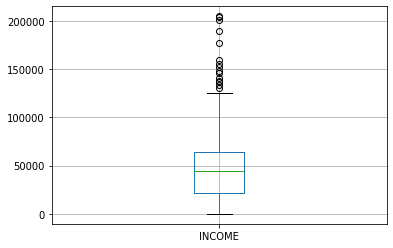

In [43]:
df_car.boxplot(column=['INCOME'])
plt.show()

Looking at the box plot, it seems that the variables INCOME, have outlier present in the variables. These outliers value needs to be teated and there are several ways of treating them:

- Drop the outlier value

- Replace the outlier value using the IQR

In [44]:
# creating a user defined function called remove_outlier for getting the threshold value 

def remove_outlier(col):
  sorted(col)
  Q1, Q3 = col.quantile([0.25, 0.75])
  IQR = Q3-Q1
  lower_range = Q1-(1.5 * IQR)
  upper_range = Q3+(1.5 * IQR)
  return lower_range, upper_range

In [45]:
lower_income, upper_income = remove_outlier(df_car['INCOME'])

df_car['INCOME'] = np.where(df_car['INCOME'] > upper_income, upper_income, df_car['INCOME'])

df_car['INCOME'] = np.where(df_car['INCOME'] < lower_income, lower_income, df_car['INCOME'])

After removing outlier, let us check it with boxplot

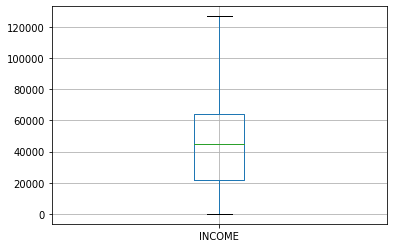

In [46]:
df_car.boxplot(column=['INCOME'])
plt.show()

**Bivariate Analysis**

When we talk about bivariate analysis, it means **analyzing 2 variables**. Since we know there are numerical and categorical variables, there is a way of analyzing these variables as shown below:

**Numerical vs. Numerical**
1. Scatterplot
2. Line plot
3. Heatmap for correlation
4. Joint plot

**Categorical vs. Numerical**
1. Bar chart
2. Violin plot
3. Categorical box plot
4.Swarm plot

Two Categorical Variables
1. Bar chart
2. Grouped bar chart
3. Point plot

In [47]:
# if we need to find the correlation
df_car.corr()

,INDEX,INCOME,TRAVEL TIME,MILES CLOCKED,CAR AGE,POSTAL CODE
INDEX,1.000000,-0.044968,0.016710,0.042880,-0.027206,-0.244783
INCOME,-0.044968,1.000000,0.062594,0.342164,0.267087,0.034204
TRAVEL TIME,0.016710,0.062594,1.000000,0.026915,0.140511,0.021390
MILES CLOCKED,0.042880,0.342164,0.026915,1.000000,0.127137,-0.111283
CAR AGE,-0.027206,0.267087,0.140511,0.127137,1.000000,-0.099449
POSTAL CODE,-0.244783,0.034204,0.021390,-0.111283,-0.099449,1.000000


**Normalizing and Scaling**

Often the variables of the data set **are of different scales i.e. one variable is in millions and others in only 100.** 

For e.g. in our data set Income is having values in thousands and age in just two digits. Since the data in these variables are of different scales, it is tough to compare these variables.

Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. 

Since the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.

In this method, we convert variables with different scales of measurements into a single scale. 

StandardScaler normalizes the data using the formula (x-mean)/standard deviation.

So we will be doing this only for the numerical variables.

In [48]:
# we use sklearn preprocessing using the function Standard Scaler

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
df_car['INCOME'] = std_scale.fit_transform(df_car[['INCOME']])
df_car['TRAVEL TIME'] = std_scale.fit_transform(df_car[['TRAVEL TIME']])
df_car['CAR AGE'] = std_scale.fit_transform(df_car[['CAR AGE']])
df_car['POSTAL CODE'] = std_scale.fit_transform(df_car[['POSTAL CODE']])
df_car['MILES CLOCKED'] = std_scale.fit_transform(df_car[['MILES CLOCKED']])

In [50]:
df_car.head()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,2.330448,No,F,Bachelors,Blue Collar,0.807947,Commercial,0.534077,Sports Car,0.137267,Texas,-0.277291
1,2,0.120293,No,M,High School,Blue Collar,-0.964473,Private,0.750925,Minivan,-1.052842,Texas,-0.277291
2,3,0.481177,No,F,Bachelors,Clerical,-0.043492,Private,-0.241513,SUV,-1.052842,Texas,-0.277291
3,4,0.900212,No,F,High School,Lawyer,-1.329803,Private,0.659849,Sports Car,0.930674,Texas,-0.277291
4,5,2.377524,No,M,High School,Blue Collar,-0.048799,Commercial,2.111280,Panel Truck,0.732322,Texas,-0.277291


**ENCODING**

One-Hot-Encoding is used to create dummy variables to replace the categories in a categorical variable into features of each category and represent it using 1 or 0 based on the presence or absence of the categorical value in the record.

This is required to do since the machine learning algorithms only work on the numerical data. 

That is why there is a need to convert the categorical column into a numerical one.

**get_dummies is the method** that creates a dummy variable for each categorical variable.

In [54]:
dummies = pd.get_dummies(df_car[['MARITAL STATUS', 'SEX', 'EDUCATION', 'JOB', 'USE', 'CAR TYPE', 'CITY']],
                         columns = ['MARITAL STATUS', 'SEX', 'EDUCATION', 'JOB', 'USE', 'CAR TYPE', 'CITY'],
                         prefix = ['married', 'sex', 'education', 'job', 'use', 'cartype', 'ciyt'], drop_first= True).head()


In [55]:
dummies.head()

,married_Yes,sex_M,education_High School,education_Masters,education_PhD,job_Clerical,job_Doctor,job_Home Maker,job_Lawyer,job_Manager,job_Professional,job_Student,use_Private,cartype_Panel Truck,cartype_Pickup,cartype_SUV,cartype_Sports Car,cartype_Van,ciyt_Houston,ciyt_Las Vegas,ciyt_Los Angeles,ciyt_New Albany,ciyt_New York City,ciyt_Philadelphia,ciyt_San Francisco,ciyt_Seattle,ciyt_Texas,ciyt_Washington
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [59]:
columns = ["MARITAL STATUS", "SEX", "EDUCATION","JOB","USE", "CAR TYPE", "CITY"]
df_car = pd.concat([df_car, dummies], axis=1)

# drop original column 'fuel type' from df

df_car.drop(columns, axis= 1, inplace=True )

In [60]:
df_car.head()

,INDEX,INCOME,TRAVEL TIME,MILES CLOCKED,CAR AGE,POSTAL CODE,married_Yes,sex_M,education_High School,education_Masters,education_PhD,job_Clerical,job_Doctor,job_Home Maker,job_Lawyer,job_Manager,job_Professional,job_Student,use_Private,cartype_Panel Truck,cartype_Pickup,cartype_SUV,cartype_Sports Car,cartype_Van,ciyt_Houston,ciyt_Las Vegas,ciyt_Los Angeles,ciyt_New Albany,ciyt_New York City,ciyt_Philadelphia,ciyt_San Francisco,ciyt_Seattle,ciyt_Texas,ciyt_Washington,married_Yes,sex_M,education_High School,education_Masters,education_PhD,job_Clerical,...,cartype_Sports Car,cartype_Van,ciyt_Houston,ciyt_Las Vegas,ciyt_Los Angeles,ciyt_New Albany,ciyt_New York City,ciyt_Philadelphia,ciyt_San Francisco,ciyt_Seattle,ciyt_Texas,ciyt_Washington,married_Yes,sex_M,education_High School,education_Masters,education_PhD,job_Clerical,job_Doctor,job_Home Maker,job_Lawyer,job_Manager,job_Professional,job_Student,use_Private,cartype_Panel Truck,cartype_Pickup,cartype_SUV,cartype_Sports Car,cartype_Van,ciyt_Houston,ciyt_Las Vegas,ciyt_Los Angeles,ciyt_New Albany,ciyt_New York City,ciyt_Philadelphia,ciyt_San Francisco,ciyt_Seattle,ciyt_Texas,ciyt_Washington
0,1,2.330448,0.807947,0.534077,0.137267,-0.277291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,0.120293,-0.964473,0.750925,-1.052842,-0.277291,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,0.481177,-0.043492,-0.241513,-1.052842,-0.277291,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,0.900212,-1.329803,0.659849,0.930674,-0.277291,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,2.377524,-0.048799,2.111280,0.732322,-0.277291,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
